# Multicast Chat Room


## EN

This is a simple chat room app made with tkinter that works as a group chat for multiple users.

By running the app, the user automatically joins the chat room, alerting other users.

The app shows a simple interface with several sections. The first section shows the messages sent in the chat room. Below is a section that allows for the user to input the message. Finally, there are two buttons: "Send" and "Leave chat".

The messages can be sent by clicking on the "Send" message or by pressing the "Enter" key.

The "Leave chat" button closes the app and alerts all users that the user has left.


## ES

Consiste en una aplicación sencilla hecha con tkinter que implementa una sala de chat para varios usuarios. 

Al ejecutar la aplicación, el usuario se une automáticamente a la sala, alertando a los demás usuarios de que se ha unido.

La aplicación muestra una interfaz con una sección en la que se ven los mensajes del grupo. Debajo se encuentra la sección de escribir el mensaje que se quiere enviar, con dos botones: "Send" y "Leave chat".

Los mensajes se pueden enviar pulsando en el botón de "Send" o pulsando la tecla Enter.

El botón de "Leave chat" cierra la aplicación y alerta a los otros usuarios que el usuario ha abandonado el chat.





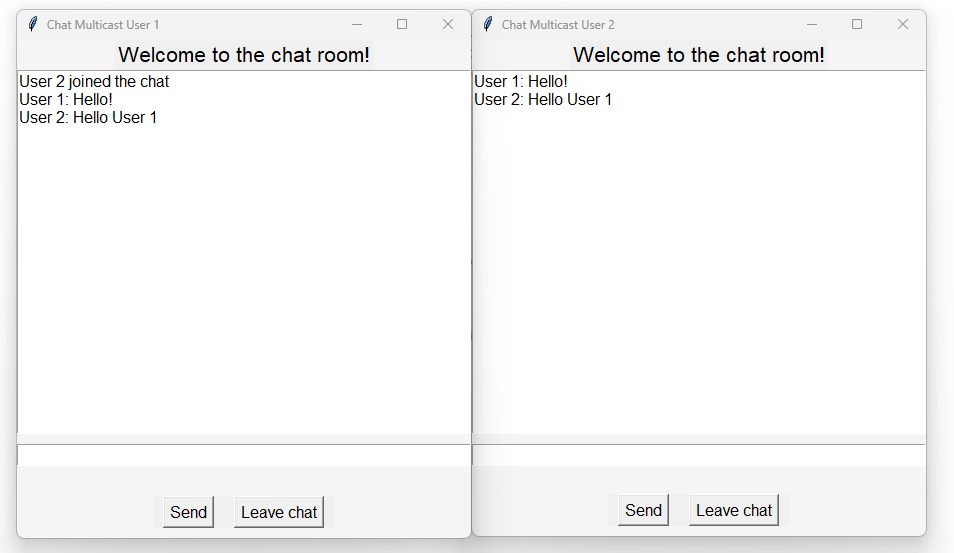


In [1]:
import tkinter as tk
import socket
import struct
import threading
import time
from datetime import datetime

global msg
msg = ""

class ChatGUI:
    def __init__(self):
        self.sock = None
        self.root = tk.Tk()
        self.root.title("Chat Multicast User 2")
        
        # Background color
        self.root.configure(bg="#F5F5F5")
        
        # Title
        self.title_label = tk.Label(self.root, text="Welcome to the chat room!", font=("Helvetica", 16))
        self.title_label.pack()

        
        # Received messages section
        self.chat_log = tk.Text(self.root, state="disabled", height=20, width=50, font=("Helvetica", 12))
        self.chat_log.pack()
        
        # Input message section
        self.entry_field = tk.Entry(self.root, width=50, font=("Helvetica", 12))
        self.entry_field.bind("<Return>", self.send_message)
        self.entry_field.pack(pady=10)
        
        # Button container
        self.button_frame = tk.Frame(self.root)
        self.button_frame.pack(side="bottom", pady=10)
        
        # Send message button
        self.send_button = tk.Button(self.button_frame, text="Send", command=self.send_message, font=("Helvetica", 12))
        self.send_button.pack(side="left", padx=10)
        
        # Leave chat button
        self.leave_button = tk.Button(self.button_frame, text="Leave chat", command = self.leave_chat, font=("Helvetica", 12))
        self.leave_button.pack(side="right", padx=10)
        
    def start_connection(self):
        self.MCAST_GRP = '224.1.1.1'
        self.MCAST_PORT = 5007

        self.sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM, socket.IPPROTO_UDP)

        self.sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)

        self.sock.bind(('', self.MCAST_PORT))
        self.sock.sendto(str.encode("User 2 joined the chat"), (self.MCAST_GRP, self.MCAST_PORT)) # Notifiy everyone that User 1 entered the chat

        mreq = struct.pack("4sl", socket.inet_aton(self.MCAST_GRP), socket.INADDR_ANY)
        self.sock.setsockopt(socket.IPPROTO_IP, socket.IP_ADD_MEMBERSHIP, mreq)

        ttl = struct.pack('b', 1)
        self.sock.setsockopt(socket.IPPROTO_IP, socket.IP_MULTICAST_TTL, ttl)
        
        self.start_listen_thread()
        global msg


        
    def listen(self,name):
        while True: # Check if user inputs "quit". In that case, it will stop receiving messages
            time.sleep(1)
            data = self.sock.recv(1024).decode()
            self.update_chat_log(data)
        print("Stopping thread")


    def start_listen_thread(self):
        name="thread1"
        reader = threading.Thread(target=self.listen, args=(name,))
        reader.start()
        
    def send_message(self, event = None):
        msg = self.entry_field.get()
        self.entry_field.delete(0, "end")
        
        if msg == "quit": # Check if user inputs "quit". In that case, send a notification to the group chat.
            self.leave_chat()

#             break
        else:
            msg_format = "User 2: "+msg
            self.sock.sendto(msg_format.encode(), (self.MCAST_GRP, self.MCAST_PORT))

            ttl = struct.pack('b', 1)
            self.sock.setsockopt(socket.IPPROTO_IP, socket.IP_MULTICAST_TTL, ttl)
#         time.sleep(1)
        
    def update_chat_log(self, message):
        self.chat_log.config(state="normal")
        self.chat_log.insert("end", message + "\n")
        self.chat_log.config(state="disabled")
        
    def leave_chat(self):
        if self.sock!= None:
            msg_format = "User 2 left the chat"
            self.sock.sendto(msg_format.encode(), (self.MCAST_GRP, self.MCAST_PORT))

            ttl = struct.pack('b', 1)
            self.sock.setsockopt(socket.IPPROTO_IP, socket.IP_MULTICAST_TTL, ttl)

            self.root.destroy() # Closes chat window
        
    def run(self):
        self.start_connection()
        self.root.mainloop()
        
        

In [2]:
app = ChatGUI()
app.run()

Exception in thread Thread-5 (listen):
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_26144\2456926883.py", line 72, in listen
  File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_26144\2456926883.py", line 98, in update_chat_log
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1702, in configure
    return self._configure('configure', cnf, kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1692, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
RuntimeError: main thread is not in main loop
